In [1]:
import matplotlib.pyplot as plt

import numpy as np
import os
from ctd.comparison.analysis.tt.tt import Analysis_TT 
from ctd.comparison.analysis.dt.dt import Analysis_DT
# Import pca
import dotenv
from ctd.comparison.comparison import Comparison
import torch
from sklearn.decomposition import PCA

dotenv.load_dotenv(dotenv.find_dotenv())

True

In [2]:
def plot_model_fps(fps, latents = None, q_thresh = 1e-5, label = "Model"):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    x_star = fps.xstar
    q_star = fps.qstar
    q_flag = q_star < q_thresh
    stability= fps.is_stable
    x_star = x_star[q_flag]
    q_star = q_star[q_flag]
    pca = PCA(n_components=3)
    if latents is not None:
        lats_flat = latents.reshape(-1, latents.shape[-1])
        lats_flat = pca.fit_transform(lats_flat)
        lats_pca = lats_flat.reshape(latents.shape[0], latents.shape[1], 3)
        x_star = pca.transform(x_star)
        for i in range(30):
            ax.plot(lats_pca[i,:,0], lats_pca[i,:,1], lats_pca[i,:,2], linewidth=0.5)
    else:
        x_star = pca.fit_transform(x_star)
    stability = stability[q_flag]
    stable_X = x_star[stability]
    unstable_X = x_star[~stability]
    ax.scatter(stable_X[:,0], stable_X[:,1], stable_X[:,2], c='g', marker='o', label = "Stable")
    ax.scatter(unstable_X[:,0], unstable_X[:,1], unstable_X[:,2], c='r', marker='x', label = "Unstable")
    ax.set_title(f"{label} FPS")
    ax.legend()
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.savefig(f"fps_{label}.pdf")

In [3]:


HOME_DIR = os.environ['HOME_DIR']
print(HOME_DIR)

pathTT = HOME_DIR + 'content/trained_models/task-trained/20240503_Fig1_NBFF_NoisyGRU/max_epochs=500 n_samples=1000 latent_size=64 seed=0 learning_rate=0.001/'
an_TT = Analysis_TT(run_name = "TT", filepath = pathTT)


path_GRU_Sweep = pathTT + "20240503_Fig1_NBFF_GRU_TT_GRU_Sweep/"
subfolders_GRU = [f.path for f in os.scandir(path_GRU_Sweep) if f.is_dir()]

path_LDS_Sweep = pathTT + "20240503_Fig1_NBFF_LDS_TT_GRU_Sweep/"
subfolders_LDS = [f.path for f in os.scandir(path_LDS_Sweep) if f.is_dir()]

path_NODE_Sweep = pathTT + "20240503_Fig1_NBFF_NODE_TT_GRU_Sweep/"
subfolders_NODE = [f.path for f in os.scandir(path_NODE_Sweep) if f.is_dir()]


/home/csverst/Github/CtDBenchmark/


In [4]:
comparison = Comparison(comparison_tag="Figure1NBFF_TTGRU_Sweep")
comparison.load_analysis(an_TT, reference_analysis=True, group = "TT")

for subfolder in subfolders_GRU:
    subfolder = subfolder + "/"
    analysis_GRU = Analysis_DT(run_name = "GRU", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_GRU, group = "GRU")

for subfolder in subfolders_LDS:
    subfolder = subfolder + "/"
    analysis_LDS = Analysis_DT(run_name = "LDS", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_LDS, group = "LDS")

for subfolder in subfolders_NODE:
    subfolder = subfolder + "/"
    analysis_NODE = Analysis_DT(run_name = "NODE", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_NODE, group = "NODE")


comparison.regroup()

Working on 1 of 16: GRU
Group: GRU
Rate R2: 0.9123451864789298
State R2: 0.8649241243843988
Working on 2 of 16: GRU
Group: GRU
Rate R2: 0.9154537823302441
State R2: 0.8483956738229531
Working on 3 of 16: GRU
Group: GRU
Rate R2: 0.9127877669333776
State R2: 0.8805480153512159
Working on 4 of 16: GRU
Group: GRU
Rate R2: 0.9179388309736969
State R2: 0.8667120734276128
Working on 5 of 16: GRU
Group: GRU
Rate R2: 0.9193365307491699
State R2: 0.8505869844076454
Working on 6 of 16: LDS
Group: LDS
Rate R2: 0.34222130934986544
State R2: 0.43820603107947353
Working on 7 of 16: LDS
Group: LDS
Rate R2: 0.33830786274464286
State R2: 0.4494975437558827
Working on 8 of 16: LDS
Group: LDS
Rate R2: 0.28797430795925455
State R2: 0.5009421956753803
Working on 9 of 16: LDS
Group: LDS
Rate R2: 0.3302115162025976
State R2: 0.45286846480486864
Working on 10 of 16: LDS
Group: LDS
Rate R2: 0.3401013045202319
State R2: 0.4490756496593697
Working on 11 of 16: NODE
Group: NODE
Rate R2: 0.7644207036214903
State R2

array([[0.91234519, 0.86492412],
       [0.91545378, 0.84839567],
       [0.91278777, 0.88054802],
       [0.91793883, 0.86671207],
       [0.91933653, 0.85058698],
       [0.34222131, 0.43820603],
       [0.33830786, 0.44949754],
       [0.28797431, 0.5009422 ],
       [0.33021152, 0.45286846],
       [0.3401013 , 0.44907565],
       [0.7644207 , 0.96006892],
       [0.77592574, 0.97300422],
       [0.77008309, 0.96772449],
       [0.76623477, 0.96580006],
       [0.7714181 , 0.96753089],
       [0.        , 0.        ]])

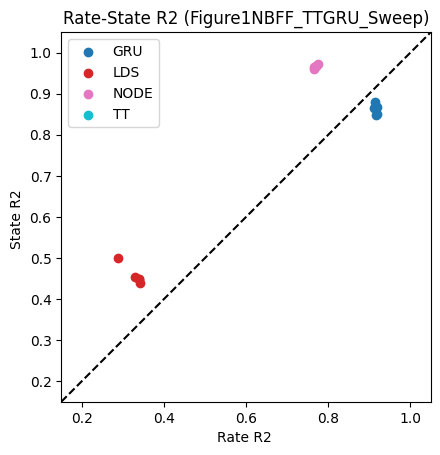

In [5]:
plot_dict = {
    "save_pdf": True,
    "ax_lim": [0.15, 1.05],
    "marker": "o",
}
comparison.compare_rate_state_r2(plot_dict = plot_dict)

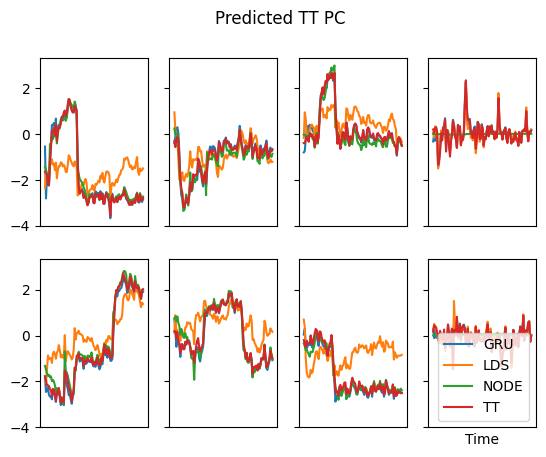

In [6]:
comparison_single = Comparison(comparison_tag="Figure1NBFF_TTGRU_DTNODE_Single")
comparison_single.load_analysis(an_TT, reference_analysis=True, group = "TT")
comparison_single.load_analysis(analysis_NODE, group = "NODE")
comparison_single.load_analysis(analysis_LDS, group = "LDS")
comparison_single.load_analysis(analysis_GRU, group = "GRU")
comparison_single.regroup()

#comparison_single.plot_trials_reference(num_trials =2, num_pcs=4)
comparison_single.plot_trials_reference_dims(num_trials=2, dims = [0,1,2,3])


Iteration 500/40000
q = 4.15E-04 +/- 1.68E-03
dq = 1.44E-06 +/- 6.26E-06

Iteration 1000/40000
q = 1.26E-04 +/- 4.80E-04
dq = 2.17E-07 +/- 9.28E-07

Iteration 1500/40000
q = 6.27E-05 +/- 2.13E-04
dq = 7.47E-08 +/- 3.11E-07

Iteration 2000/40000
q = 3.75E-05 +/- 1.11E-04
dq = 3.83E-08 +/- 1.35E-07

Iteration 2500/40000
q = 2.47E-05 +/- 6.60E-05
dq = 2.51E-08 +/- 6.91E-08

Iteration 3000/40000
q = 1.73E-05 +/- 4.30E-05
dq = 2.44E-08 +/- 6.04E-08

Iteration 3500/40000
q = 1.25E-05 +/- 2.98E-05
dq = 1.94E-08 +/- 4.46E-08

Iteration 4000/40000
q = 9.38E-06 +/- 2.15E-05
dq = 2.61E-08 +/- 6.57E-08

Iteration 4500/40000
q = 7.16E-06 +/- 1.61E-05
dq = 3.41E-08 +/- 1.15E-07

Iteration 5000/40000
q = 5.55E-06 +/- 1.24E-05
dq = 3.84E-08 +/- 1.00E-07

Iteration 5500/40000
q = 4.37E-06 +/- 9.63E-06
dq = 5.16E-08 +/- 1.41E-07

Iteration 6000/40000
q = 3.57E-06 +/- 7.56E-06
dq = 7.64E-08 +/- 1.86E-07

Iteration 6500/40000
q = 2.90E-06 +/- 5.98E-06
dq = 9.20E-08 +/- 2.22E-07

Iteration 7000/40000
q = 

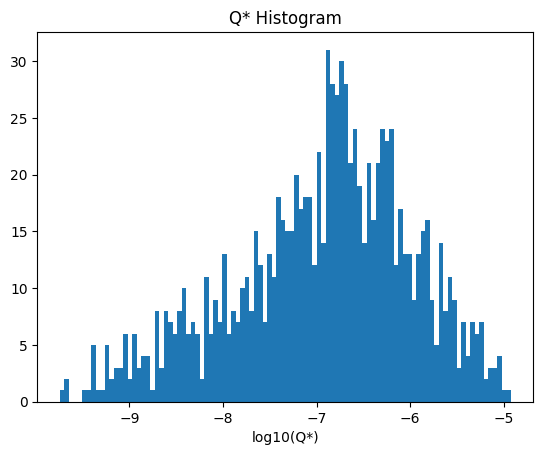

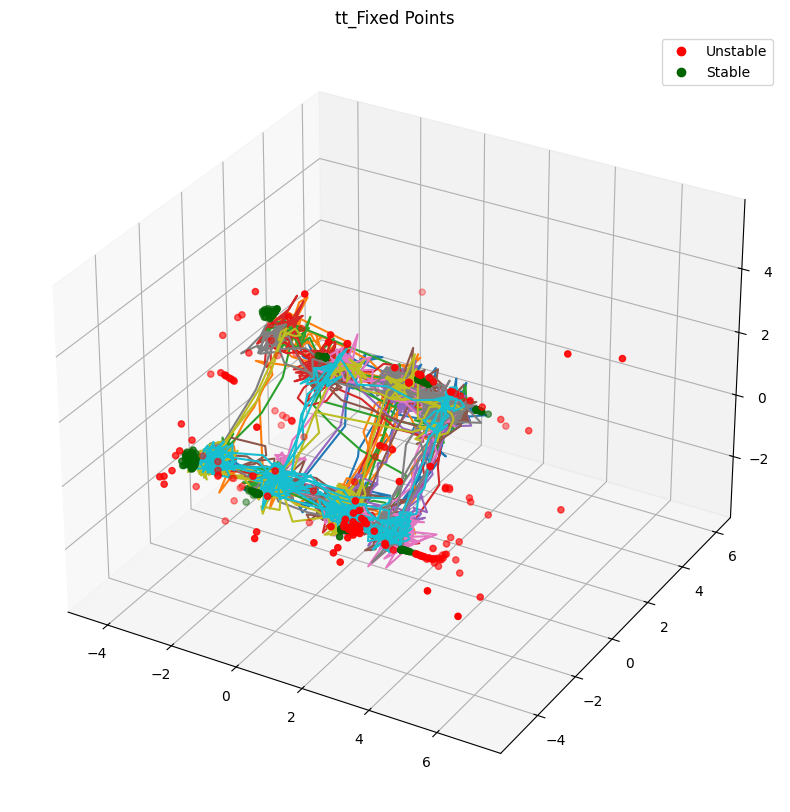

In [7]:
fpsTT = an_TT.plot_fps(
    inputs = torch.zeros(3),
    max_iters = 40000,
    learning_rate =5e-3,
)


Iteration 500/40000
q = 1.49E-03 +/- 9.20E-03
dq = 5.26E-06 +/- 4.18E-05

Iteration 1000/40000
q = 4.52E-04 +/- 2.19E-03
dq = 7.70E-07 +/- 4.30E-06

Iteration 1500/40000
q = 2.26E-04 +/- 1.01E-03
dq = 2.66E-07 +/- 1.29E-06

Iteration 2000/40000
q = 1.35E-04 +/- 5.83E-04
dq = 1.46E-07 +/- 6.87E-07

Iteration 2500/40000
q = 8.89E-05 +/- 3.73E-04
dq = 9.27E-08 +/- 3.60E-07

Iteration 3000/40000
q = 6.19E-05 +/- 2.53E-04
dq = 1.23E-07 +/- 5.85E-07

Iteration 3500/40000
q = 4.51E-05 +/- 1.79E-04
dq = 2.18E-07 +/- 8.22E-07

Iteration 4000/40000
q = 3.38E-05 +/- 1.29E-04
dq = 2.85E-07 +/- 8.85E-07

Iteration 4500/40000
q = 2.59E-05 +/- 9.44E-05
dq = 3.73E-07 +/- 1.01E-06

Iteration 5000/40000
q = 2.05E-05 +/- 6.99E-05
dq = 5.32E-07 +/- 1.47E-06

Iteration 5500/40000
q = 1.65E-05 +/- 5.24E-05
dq = 6.24E-07 +/- 1.59E-06

Iteration 6000/40000
q = 1.37E-05 +/- 3.97E-05
dq = 6.40E-07 +/- 1.58E-06

Iteration 6500/40000
q = 1.16E-05 +/- 3.04E-05
dq = 8.06E-07 +/- 1.90E-06

Iteration 7000/40000
q = 

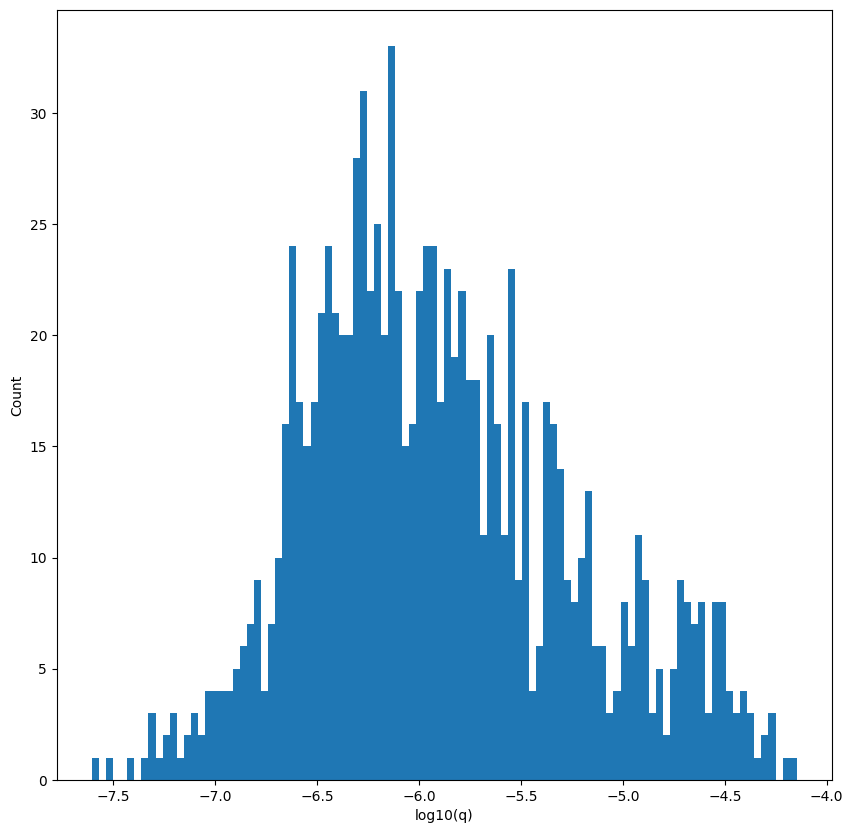

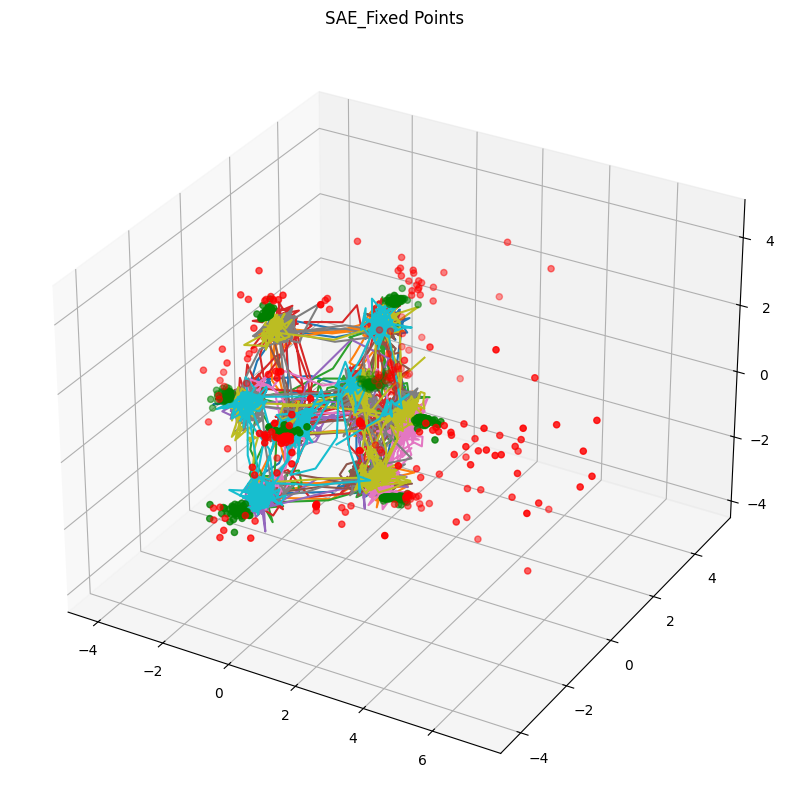

In [8]:
fpsDT_GRU = analysis_GRU.plot_fps(
    inputs = torch.zeros(3),
    max_iters = 40000,
    learning_rate =5e-3,
)


Iteration 500/40000
q = 7.75E-06 +/- 1.61E-04
dq = 2.08E-09 +/- 2.33E-08

Iteration 1000/40000
q = 3.81E-10 +/- 1.15E-08
dq = 3.41E-11 +/- 8.63E-10

Iteration 1500/40000
q = 8.37E-11 +/- 2.63E-09
dq = 6.78E-11 +/- 2.15E-09

Iteration 2000/40000
q = 1.25E-10 +/- 2.68E-09
dq = 3.97E-11 +/- 8.06E-10

Iteration 2500/40000
q = 2.44E-10 +/- 4.12E-09
dq = 1.92E-10 +/- 4.70E-09

Iteration 3000/40000
q = 2.87E-10 +/- 5.93E-09
dq = 2.14E-10 +/- 6.03E-09

Iteration 3500/40000
q = 8.09E-10 +/- 1.30E-08
dq = 2.58E-10 +/- 3.67E-09

Iteration 4000/40000
q = 6.33E-10 +/- 1.39E-08
dq = 1.55E-10 +/- 1.93E-09

Iteration 4500/40000
q = 5.11E-10 +/- 7.83E-09
dq = 2.56E-10 +/- 4.15E-09

Iteration 5000/40000
q = 1.15E-09 +/- 1.40E-08
dq = 5.65E-10 +/- 6.78E-09

Iteration 5500/40000
q = 2.99E-10 +/- 4.75E-09
dq = 1.77E-10 +/- 3.39E-09

Iteration 6000/40000
q = 7.45E-10 +/- 9.90E-09
dq = 2.82E-10 +/- 3.43E-09

Iteration 6500/40000
q = 1.18E-09 +/- 1.20E-08
dq = 4.15E-10 +/- 3.87E-09

Iteration 7000/40000
q = 

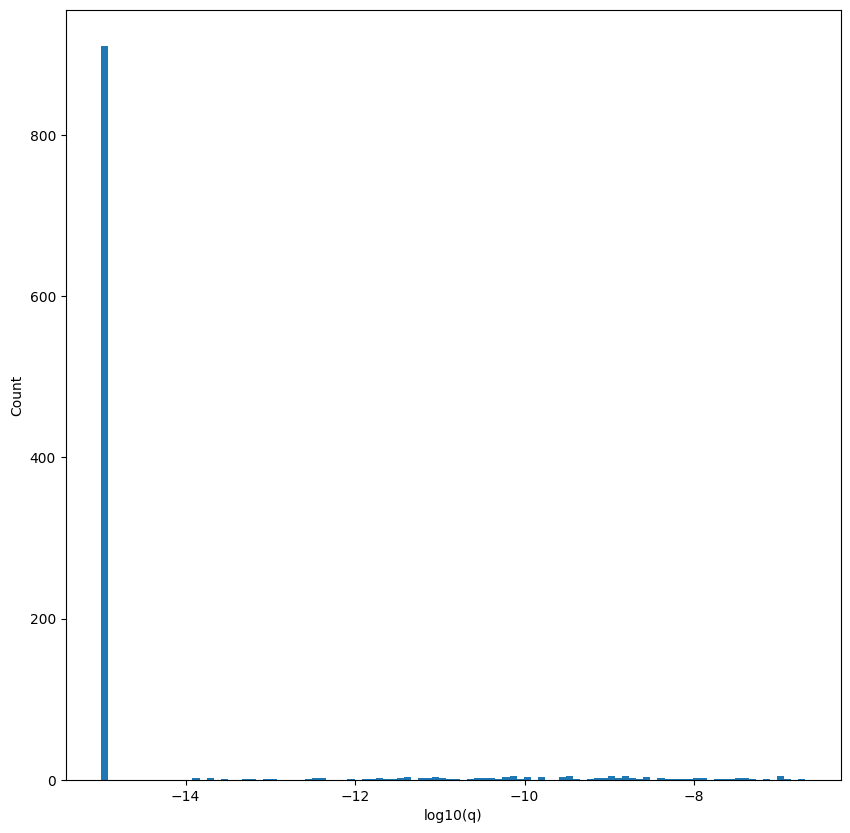

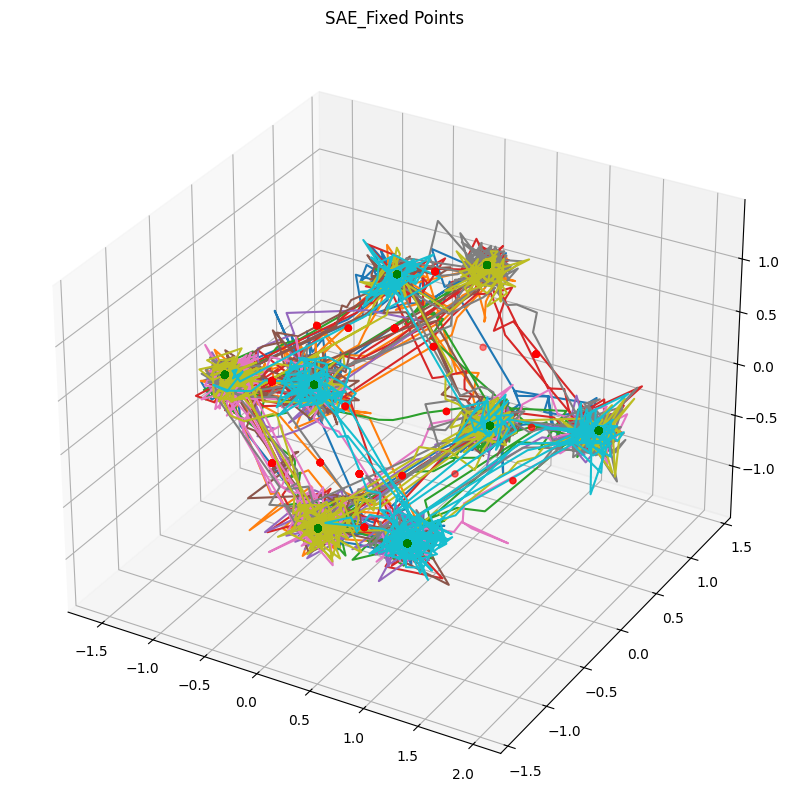

In [9]:
fpsDT_NODE = analysis_NODE.plot_fps(
    inputs = torch.zeros(3),
    max_iters = 40000,
    learning_rate =5e-3,
)


Iteration 500/40000
q = 8.22E-04 +/- 1.97E-03
dq = 7.67E-07 +/- 1.58E-05

Iteration 1000/40000
q = 6.99E-04 +/- 8.57E-04
dq = 1.47E-07 +/- 2.07E-07

Iteration 1500/40000
q = 6.18E-04 +/- 7.78E-04
dq = 1.76E-07 +/- 2.30E-07

Iteration 2000/40000
q = 5.29E-04 +/- 6.95E-04
dq = 1.90E-07 +/- 2.41E-07

Iteration 2500/40000
q = 4.37E-04 +/- 6.12E-04
dq = 1.95E-07 +/- 2.44E-07

Iteration 3000/40000
q = 3.48E-04 +/- 5.33E-04
dq = 1.90E-07 +/- 2.29E-07

Iteration 3500/40000
q = 2.69E-04 +/- 4.59E-04
dq = 1.92E-07 +/- 2.74E-07



Iteration 4000/40000
q = 2.00E-04 +/- 3.91E-04
dq = 1.76E-07 +/- 3.25E-07

Iteration 4500/40000
q = 1.45E-04 +/- 3.31E-04
dq = 1.92E-07 +/- 3.42E-07

Iteration 5000/40000
q = 1.02E-04 +/- 2.78E-04
dq = 1.87E-07 +/- 3.57E-07

Iteration 5500/40000
q = 7.05E-05 +/- 2.31E-04
dq = 2.14E-07 +/- 4.27E-07

Iteration 6000/40000
q = 4.79E-05 +/- 1.89E-04
dq = 2.54E-07 +/- 5.12E-07

Iteration 6500/40000
q = 3.24E-05 +/- 1.52E-04
dq = 3.03E-07 +/- 6.61E-07

Iteration 7000/40000
q = 2.16E-05 +/- 1.19E-04
dq = 3.00E-07 +/- 6.15E-07

Iteration 7500/40000
q = 1.43E-05 +/- 8.94E-05
dq = 3.33E-07 +/- 6.18E-07

Iteration 8000/40000
q = 9.43E-06 +/- 6.36E-05
dq = 3.34E-07 +/- 6.32E-07

Iteration 8500/40000
q = 6.40E-06 +/- 4.19E-05
dq = 3.62E-07 +/- 6.65E-07

Iteration 9000/40000
q = 4.30E-06 +/- 2.52E-05
dq = 3.40E-07 +/- 6.25E-07

Iteration 9500/40000
q = 2.88E-06 +/- 1.36E-05
dq = 3.90E-07 +/- 6.88E-07

Iteration 10000/40000
q = 2.21E-06 +/- 6.86E-06
dq = 3.62E-07 +/- 6.37E-07

Iteration 10500/40000
q

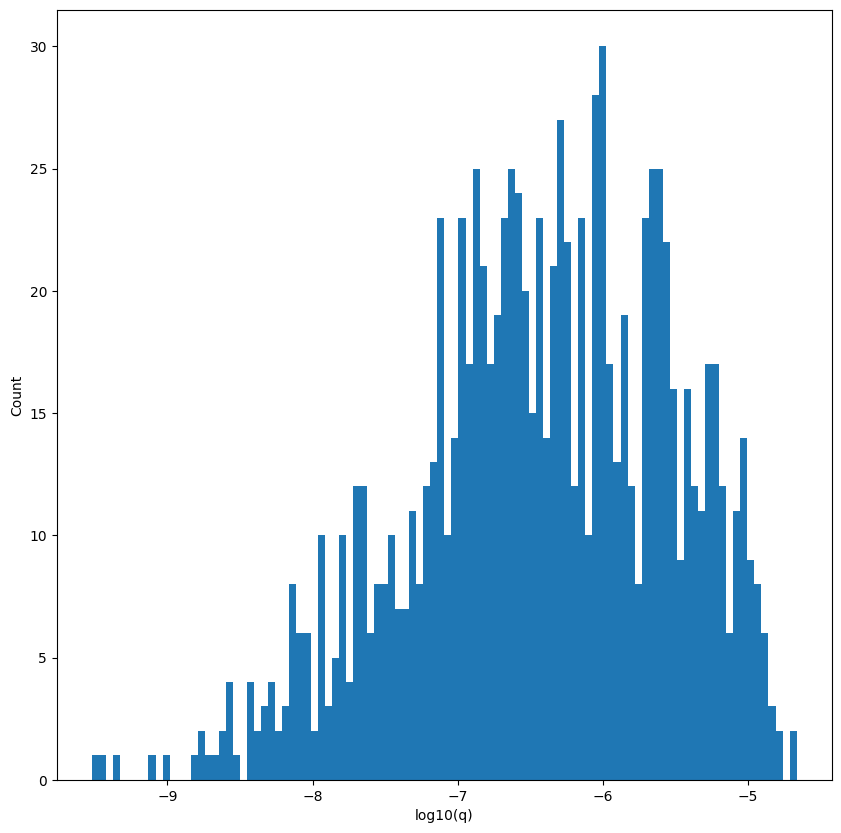

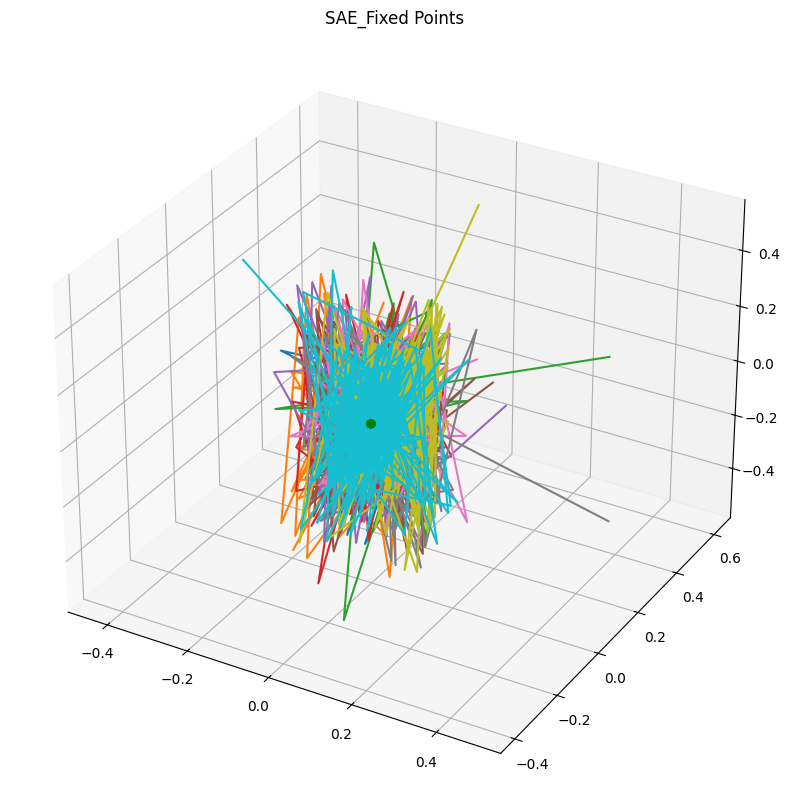

In [10]:
fpsDT_LDS = analysis_LDS.plot_fps(
    inputs = torch.zeros(3),
    max_iters = 40000,
    learning_rate =5e-3,
)

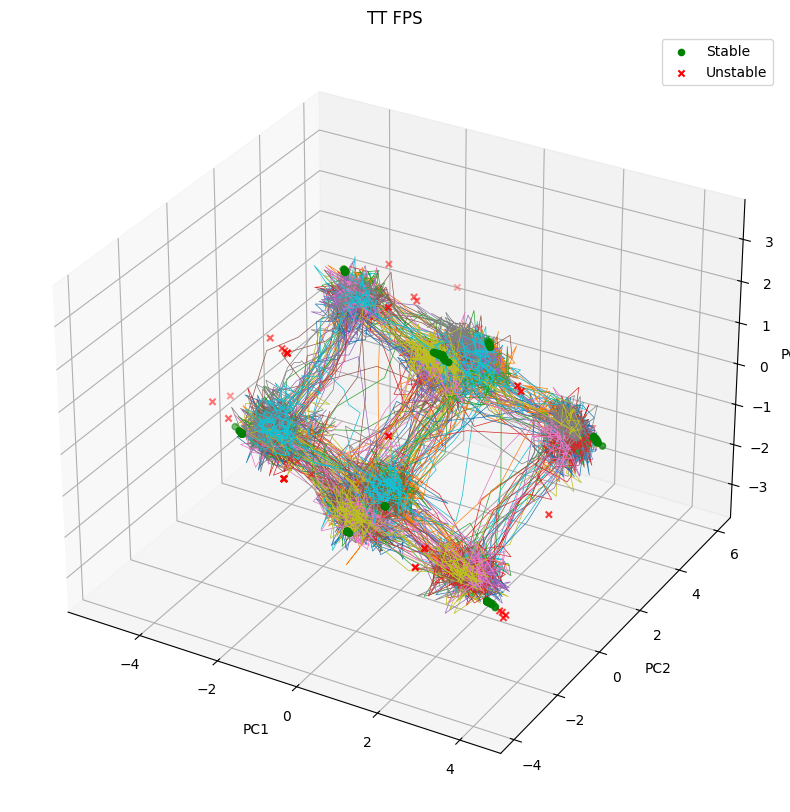

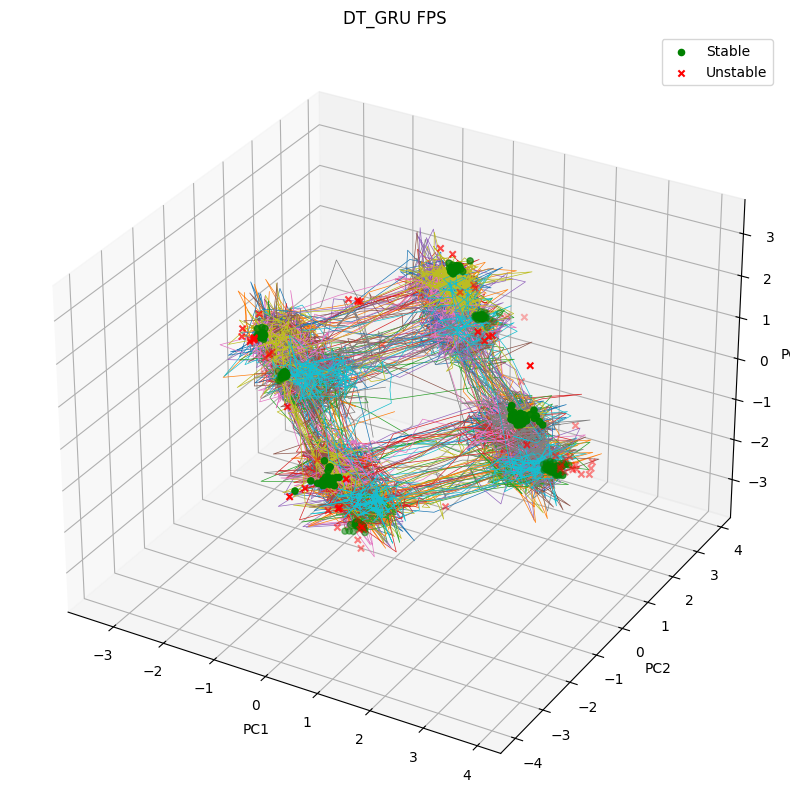

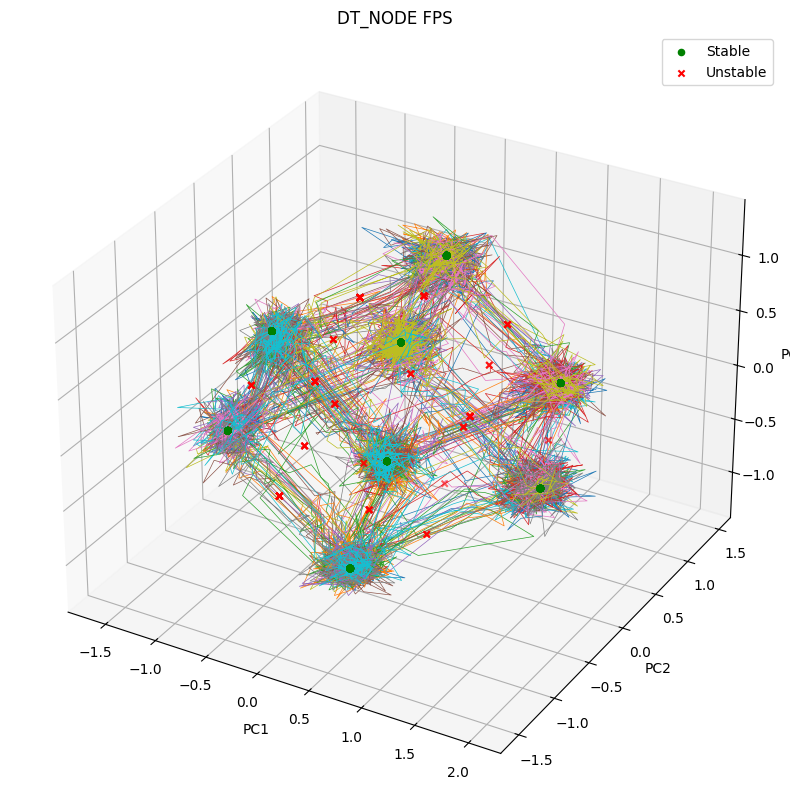

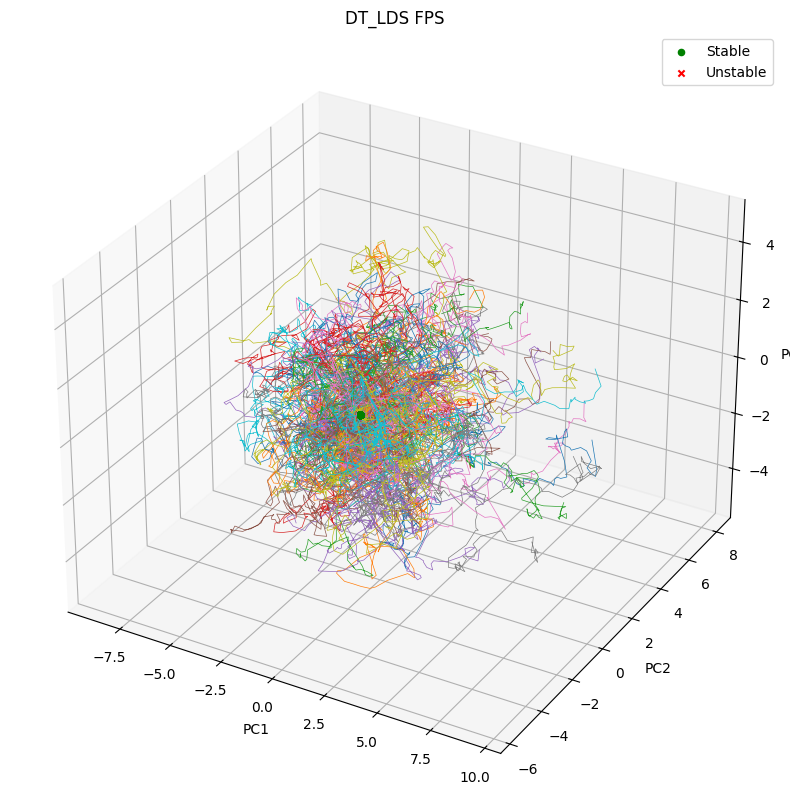

In [11]:
lats_TT = an_TT.get_latents().detach().numpy()
lats_GRU = analysis_GRU.get_latents().detach().numpy()
lats_NODE = analysis_NODE.get_latents().detach().numpy()
lats_LDS = analysis_LDS.get_latents().detach().numpy()

plot_model_fps(fpsTT, latents=lats_TT, q_thresh = 1e-7, label = "TT")
plot_model_fps(fpsDT_GRU, latents = lats_GRU, q_thresh = 1e-6, label = "DT_GRU")
plot_model_fps(fpsDT_NODE, latents = lats_NODE, q_thresh = 1e-7, label = "DT_NODE")
plot_model_fps(fpsDT_LDS, latents = lats_LDS, q_thresh = 1e-7, label = "DT_LDS")

In [12]:

comparison_models = Comparison()
comparison_models.load_analysis(an_TT, reference_analysis=True, group = "TT")
comparison_models.load_analysis(analysis_GRU, group = "GRU")
comparison_models.load_analysis(analysis_NODE, group = "NODE")
comparison_models.load_analysis(analysis_LDS, group = "LDS")
comparison_models.regroup()

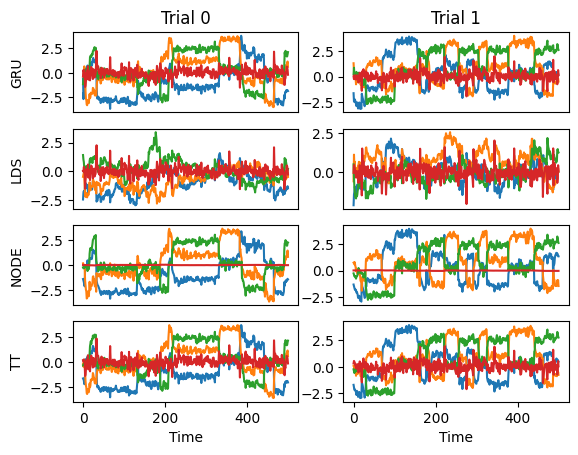

In [13]:
comparison_models.plot_trials_reference(num_trials=2, num_pcs=4)


Iteration 500/20000
q = 2.23E-02 +/- 1.05E-01
dq = 1.08E-04 +/- 4.37E-04

Iteration 1000/20000
q = 3.17E-03 +/- 2.23E-02
dq = 9.13E-06 +/- 5.60E-05

Iteration 1500/20000
q = 1.23E-03 +/- 7.95E-03
dq = 1.35E-06 +/- 1.55E-05

Iteration 2000/20000
q = 8.76E-04 +/- 3.08E-03
dq = 3.40E-07 +/- 6.10E-06

Iteration 2500/20000
q = 7.71E-04 +/- 1.32E-03
dq = 1.26E-07 +/- 2.25E-06

Iteration 3000/20000
q = 7.25E-04 +/- 9.17E-04
dq = 6.95E-08 +/- 6.09E-07

Iteration 3500/20000
q = 6.93E-04 +/- 8.46E-04
dq = 6.24E-08 +/- 1.32E-07

Iteration 4000/20000
q = 6.60E-04 +/- 8.10E-04
dq = 7.08E-08 +/- 9.89E-08

Iteration 4500/20000
q = 6.22E-04 +/- 7.74E-04
dq = 8.21E-08 +/- 1.11E-07

Iteration 5000/20000
q = 5.78E-04 +/- 7.33E-04
dq = 9.38E-08 +/- 1.24E-07

Iteration 5500/20000
q = 5.29E-04 +/- 6.89E-04
dq = 1.04E-07 +/- 1.33E-07

Iteration 6000/20000
q = 4.74E-04 +/- 6.41E-04
dq = 1.12E-07 +/- 1.39E-07

Iteration 6500/20000
q = 4.17E-04 +/- 5.91E-04
dq = 1.17E-07 +/- 1.43E-07

Iteration 7000/20000
q = 

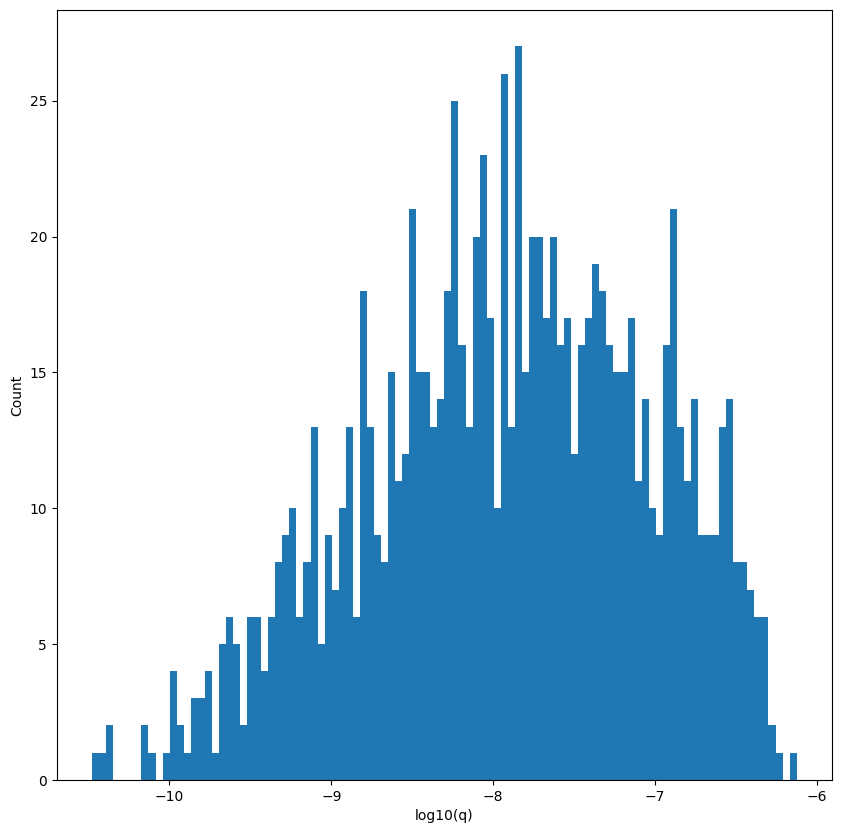

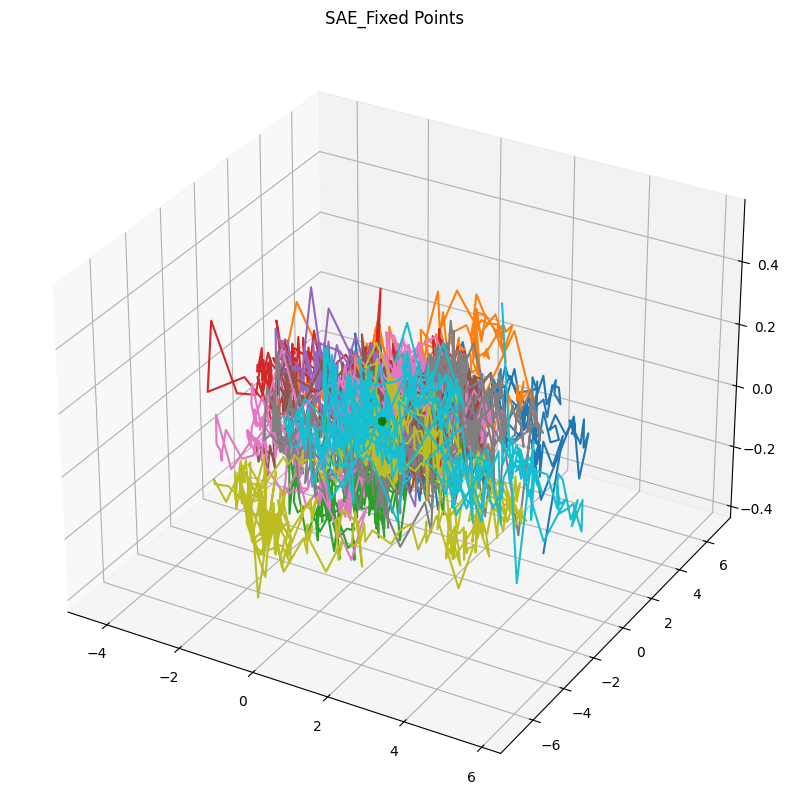

In [14]:
lds_fps = analysis_LDS.plot_fps(
    inputs = torch.zeros(3),
    learning_rate = 1e-3,
    n_inits=1024,
    max_iters = 20000,                      
)




Iteration 500/50000
q = 3.32E-04 +/- 1.11E-03
dq = 1.35E-06 +/- 4.92E-06

Iteration 1000/50000
q = 5.79E-05 +/- 3.10E-04
dq = 1.26E-07 +/- 6.90E-07

Iteration 1500/50000
q = 2.03E-05 +/- 1.81E-04
dq = 3.09E-08 +/- 2.35E-07

Iteration 2000/50000
q = 1.21E-05 +/- 1.67E-04
dq = 1.22E-08 +/- 1.42E-07

Iteration 2500/50000
q = 8.43E-06 +/- 1.58E-04
dq = 2.01E-09 +/- 2.73E-08

Iteration 3000/50000
q = 4.41E-06 +/- 1.19E-04
dq = 1.99E-09 +/- 3.71E-08



Iteration 3500/50000
q = 3.88E-06 +/- 1.17E-04
dq = 1.72E-09 +/- 4.15E-08

Iteration 4000/50000
q = 1.27E-07 +/- 2.93E-06
dq = 2.00E-10 +/- 4.77E-09

Iteration 4500/50000
q = 4.48E-08 +/- 1.43E-06
dq = 1.91E-10 +/- 6.11E-09

Iteration 5000/50000
q = 5.44E-12 +/- 1.73E-10
dq = 1.63E-13 +/- 5.19E-12

Iteration 5500/50000
q = 1.88E-14 +/- 6.67E-14
dq = 2.53E-16 +/- 2.97E-15

Iteration 6000/50000
q = 1.03E-14 +/- 3.84E-14
dq = 2.99E-16 +/- 2.85E-15

Iteration 6500/50000
q = 5.42E-15 +/- 2.09E-14
dq = 2.01E-16 +/- 1.38E-15

Iteration 7000/50000
q = 2.84E-15 +/- 1.17E-14
dq = 1.15E-16 +/- 7.22E-16

Iteration 7500/50000
q = 1.49E-15 +/- 6.49E-15
dq = 1.70E-16 +/- 1.43E-15

Iteration 8000/50000
q = 7.75E-16 +/- 3.80E-15
dq = 1.02E-16 +/- 1.00E-15

Iteration 8500/50000
q = 1.34E-14 +/- 4.15E-13
dq = 2.05E-14 +/- 6.52E-13

Iteration 9000/50000
q = 3.72E-16 +/- 3.33E-15
dq = 2.17E-16 +/- 2.98E-15

Iteration 9500/50000
q = 6.92E-15 +/- 2.17E-13
dq = 3.59E-16 +/- 8.13E-15

Iteration 10000/50000
q 

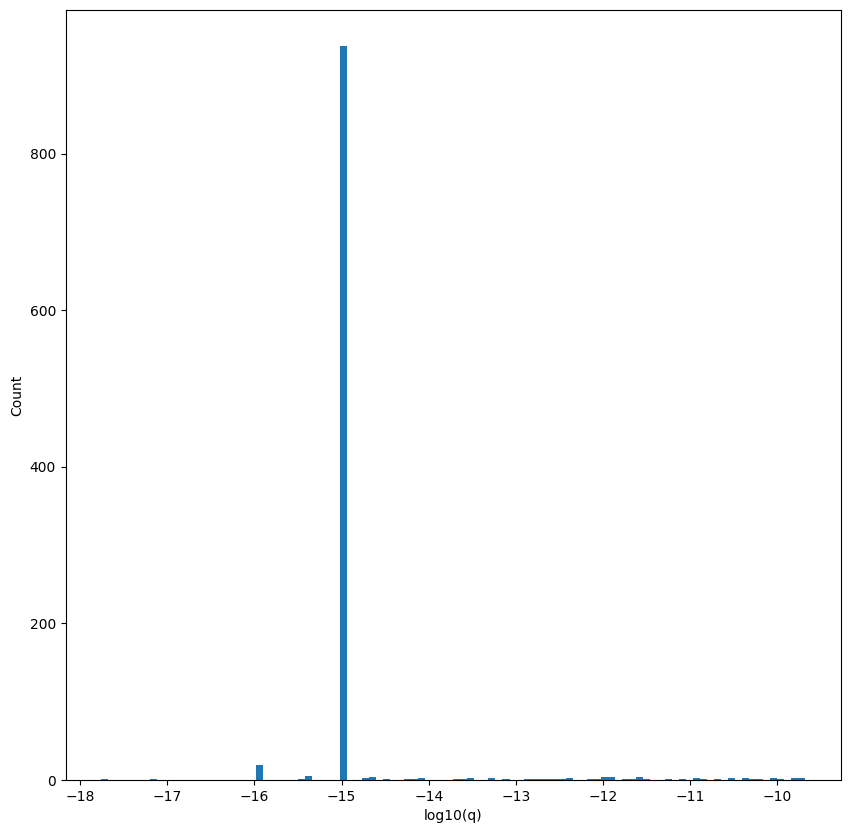

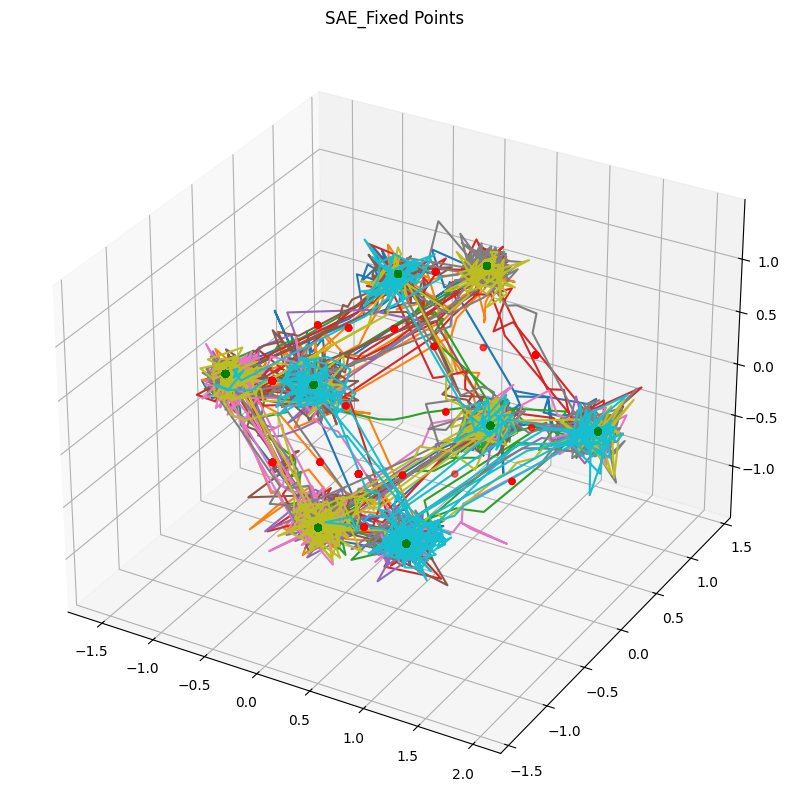

In [15]:
node_fps = analysis_NODE.plot_fps(
    inputs = torch.zeros(3),
    learning_rate = 6e-4,
    n_inits=1024,
    max_iters = 50000,                      
)


Iteration 500/50000
q = 6.31E-02 +/- 3.69E-01
dq = 2.09E-04 +/- 9.76E-04

Iteration 1000/50000
q = 1.83E-02 +/- 1.31E-01
dq = 3.48E-05 +/- 2.23E-04

Iteration 1500/50000
q = 7.85E-03 +/- 5.27E-02
dq = 1.11E-05 +/- 8.49E-05

Iteration 2000/50000
q = 4.32E-03 +/- 2.77E-02
dq = 4.55E-06 +/- 3.19E-05

Iteration 2500/50000
q = 2.68E-03 +/- 1.65E-02
dq = 2.33E-06 +/- 1.56E-05

Iteration 3000/50000
q = 1.79E-03 +/- 1.07E-02
dq = 1.35E-06 +/- 8.74E-06

Iteration 3500/50000
q = 1.25E-03 +/- 7.32E-03
dq = 8.41E-07 +/- 5.25E-06

Iteration 4000/50000
q = 9.11E-04 +/- 5.24E-03
dq = 5.59E-07 +/- 3.35E-06

Iteration 4500/50000
q = 6.77E-04 +/- 3.85E-03
dq = 3.91E-07 +/- 2.31E-06

Iteration 5000/50000
q = 5.10E-04 +/- 2.87E-03
dq = 2.83E-07 +/- 1.67E-06

Iteration 5500/50000
q = 3.88E-04 +/- 2.16E-03
dq = 2.09E-07 +/- 1.24E-06

Iteration 6000/50000
q = 2.98E-04 +/- 1.62E-03
dq = 1.57E-07 +/- 9.21E-07

Iteration 6500/50000
q = 2.29E-04 +/- 1.23E-03
dq = 1.19E-07 +/- 6.88E-07

Iteration 7000/50000
q = 

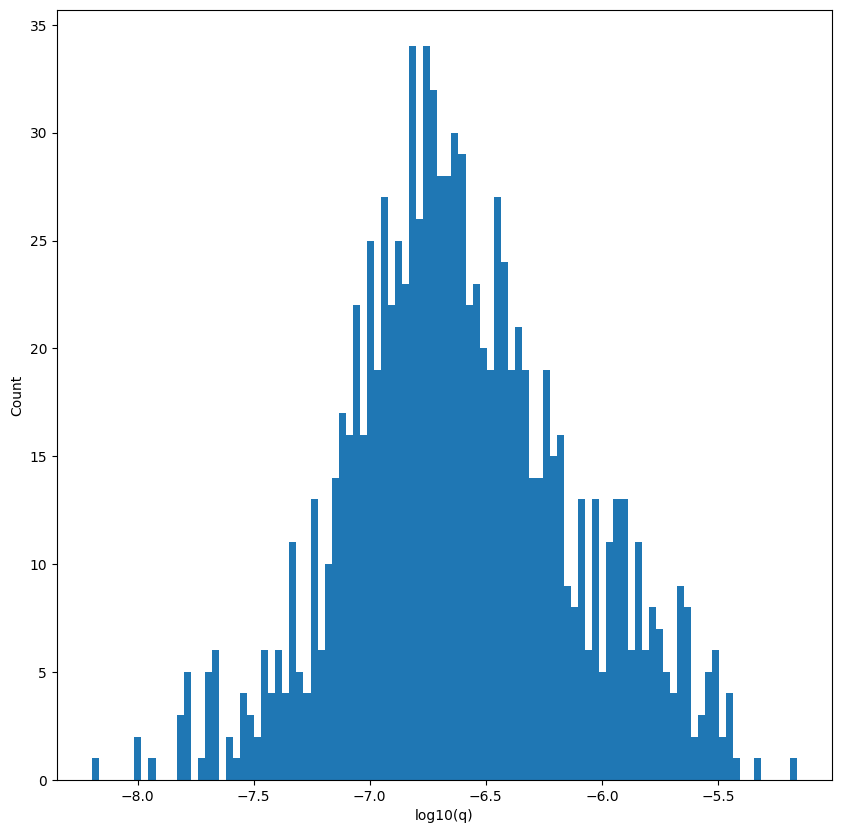

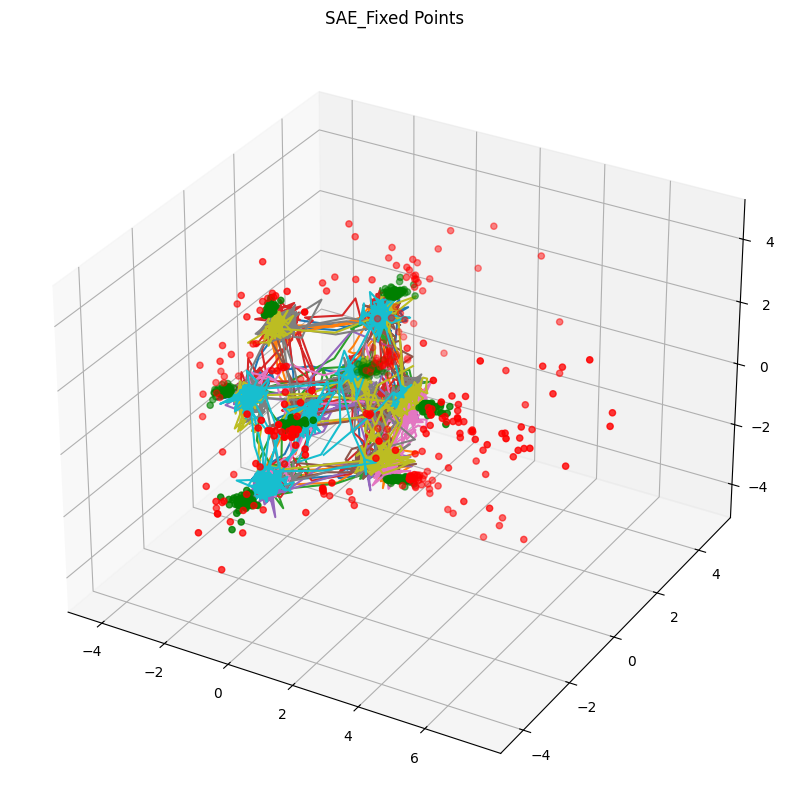

In [16]:
gru_fps = analysis_GRU.plot_fps(
    inputs = torch.zeros(3),
    learning_rate = 6e-4,
    n_inits=1024,
    max_iters = 50000,                      
)

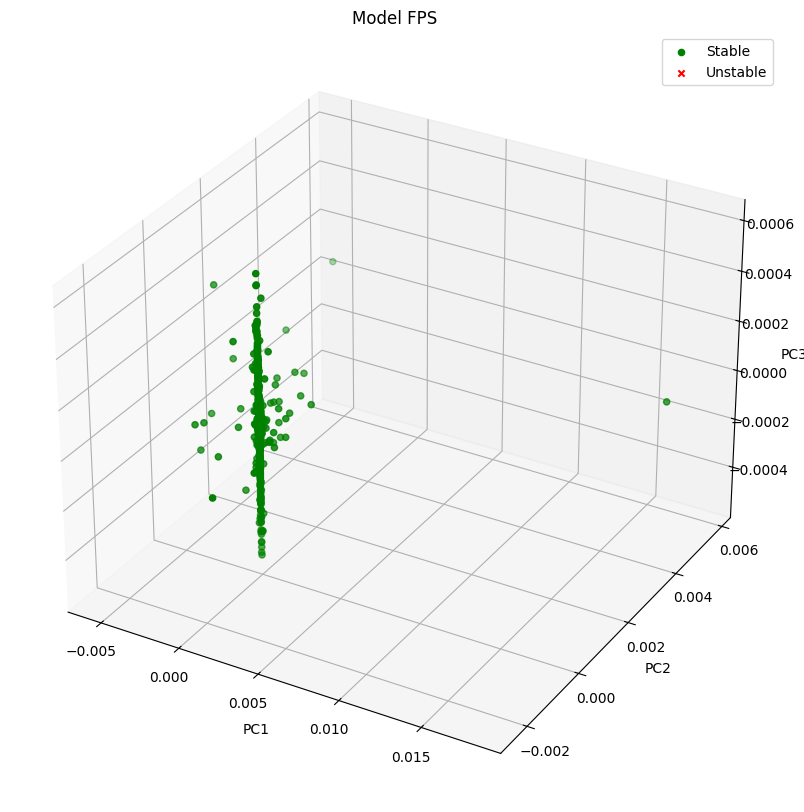

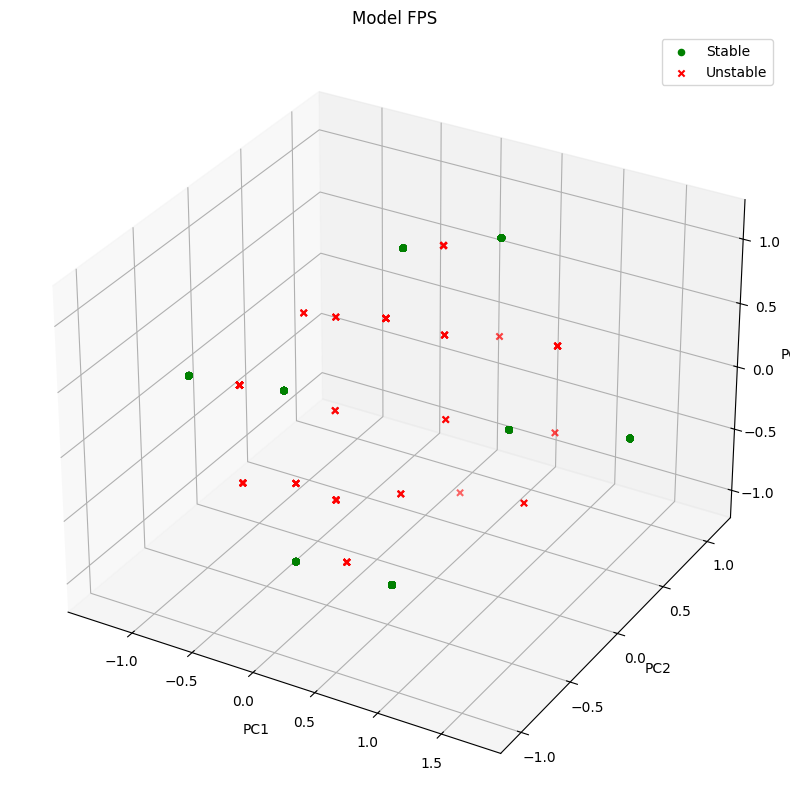

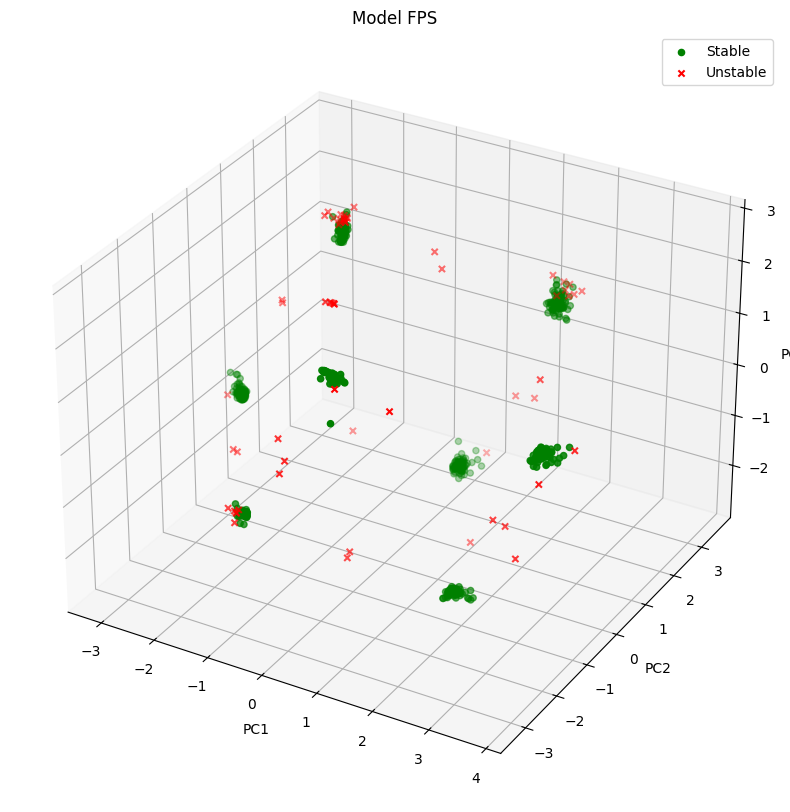

In [17]:
plot_model_fps(lds_fps, q_thresh = 1e-4)
plot_model_fps(node_fps, q_thresh = 1e-4)
plot_model_fps(gru_fps, q_thresh = 4e-7)